In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/papers/maritime-incidents-ai-agents


In [6]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/papers/maritime-incidents-ai-agents/.env.example


True

In [7]:
%%time

from llm_toolkit.eval_openai import *
from tqdm.notebook import tqdm

tqdm.pandas()

data_path = os.getenv("DATA_PATH")
results_path = "paper/data/open_source_model_results_v3.csv"
num_ctx = os.getenv("NUM_CTX")
data_path, results_path, num_ctx

loading env vars from: /Users/inflaton/code/papers/maritime-incidents-ai-agents/.env.example
Adding /Users/inflaton/code/papers/maritime-incidents-ai-agents to sys.path
loading /Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py
CPU times: user 1.36 s, sys: 227 ms, total: 1.59 s
Wall time: 3.05 s


('dataset/GMRID_v3.csv', 'paper/data/open_source_model_results_v3.csv', '8192')

In [8]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.data_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unnamed: 0                                               1147 non-null   int64 
 1   Headline_Details                                         1146 non-null   object
 2   Year                                                     1147 non-null   int64 
 3   Month                                                    1147 non-null   int64 
 4   Week                                                     1147 non-null   int64 
 5   Details_cleaned                                          1147 non-null   object
 6   Category                                                 1147 non-null   object
 7   Summarized_label                                         1147 non-null   object
 8   gpt-4o_label                          

In [9]:
# test_data_path = data_path.replace(".csv", "-test.csv")
# df_test = pd.read_csv(test_data_path)
# df["gpt-4o_label"] = df_test["gpt-4o_label"]
# df.to_csv(results_path)

In [10]:
df_openai = pd.read_csv("results/openai_model_results_v3.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1147 non-null   int64  
 1   Headline                     1147 non-null   object 
 2   Details                      1147 non-null   object 
 3   Severity                     1147 non-null   object 
 4   Region                       1147 non-null   object 
 5   Datetime                     1147 non-null   object 
 6   lat                          757 non-null    float64
 7   lon                          757 non-null    float64
 8   maritime_label               1147 non-null   bool   
 9   found_ports                  1147 non-null   object 
 10  contains_port_info           1147 non-null   bool   
 11  if_labeled                   1146 non-null   object 
 12  Headline_Details             1146 non-null   object 
 13  Year              

In [11]:
openai_results_columns = df_openai.columns[19:]
openai_results_columns

Index(['gpt-4o-mini/shots-00(1.024)', 'gpt-4o-mini/shots-01(1.035)',
       'gpt-4o-mini/shots-02(1.061)', 'gpt-4o-mini/shots-04(1.117)',
       'gpt-4o-mini/shots-08(1.278)', 'gpt-4o/shots-00(1.191)',
       'gpt-4o/shots-01(1.165)', 'gpt-4o/shots-02(1.183)',
       'gpt-4o/shots-04(1.242)', 'gpt-4o/shots-08(1.244)',
       'gpt-4o-mini/shots-10(1.230)', 'gpt-4o/shots-10(1.257)'],
      dtype='object')

In [12]:
df[openai_results_columns] = df_openai[openai_results_columns]

In [13]:
result_columns = [
    col for col in df.columns.to_list() if col.split("/shots")[0] in model_orders.keys()
]
result_columns.sort()
result_columns = sorted(
    result_columns, key=lambda x: model_orders[x.split("/shots")[0]]
)
result_columns

['meta-llama/Meta-Llama-3.1-8B-Instruct/shots-00(2.356)',
 'meta-llama/Meta-Llama-3.1-8B-Instruct/shots-01(2.485)',
 'meta-llama/Meta-Llama-3.1-8B-Instruct/shots-02(3.073)',
 'meta-llama/Meta-Llama-3.1-8B-Instruct/shots-04(4.029)',
 'meta-llama/Meta-Llama-3.1-8B-Instruct/shots-08(5.516)',
 'meta-llama/Meta-Llama-3.1-8B-Instruct/shots-10(1.196)',
 'meta-llama/Meta-Llama-3.1-8B-Instruct/shots-10(1.202)',
 'meta-llama/Meta-Llama-3.1-70B-Instruct/shots-00(23.488)',
 'meta-llama/Meta-Llama-3.1-70B-Instruct/shots-01(20.716)',
 'meta-llama/Meta-Llama-3.1-70B-Instruct/shots-02(22.781)',
 'meta-llama/Meta-Llama-3.1-70B-Instruct/shots-04(27.533)',
 'meta-llama/Meta-Llama-3.1-70B-Instruct/shots-08(28.573)',
 'meta-llama/Meta-Llama-3.1-70B-Instruct/shots-10(2.639)',
 'gpt-4o-mini/shots-00(1.024)',
 'gpt-4o-mini/shots-01(1.035)',
 'gpt-4o-mini/shots-02(1.061)',
 'gpt-4o-mini/shots-04(1.117)',
 'gpt-4o-mini/shots-08(1.278)',
 'gpt-4o-mini/shots-10(1.230)',
 'gpt-4o/shots-00(1.191)',
 'gpt-4o/shots-0

In [14]:
data_col_start_idx = 0
result_col_start_idx = 9

In [15]:
# df_test = pd.read_csv("dataset/GMRID_v3-test.csv")
# df["gpt-4o_label"] = df_test["gpt-4o_label"]
# df.to_csv(results_path, index=False)

In [16]:
metrics_df = get_metrics(
    df,
    result_col_start_idx - data_col_start_idx,
    mean_eval_time=True,
    label_column="gpt-4o_label",
)
metrics_df

meta-llama/Meta-Llama-3.1-8B-Instruct/shots-00(2.356) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
meta-llama/Meta-Llama-3.1-8B-Instruct/shots-00(2.356) - metrics: {'f1': 0.7460895626823899, 'accuracy': 0.7332170880557978}
Generating prompt templates for 0 shots with Headline_Details and gpt-4o_label
meta-llama/Meta-Llama-3.1-8B-Instruct/shots-01(2.485) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
meta-llama/Meta-Llama-3.1-8B-Instruct/shots-01(2.485) - metrics: {'f1': 0.8950393166717612, 'accuracy': 0.8753269398430689}
Generating prompt templates for 1 shots with Headline_Details and gpt-4o_label
meta-llama/Meta-Llama-3.1-8B-Instruct/shots-02(3.073) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}
meta-llama/Meta-Llama-3.1-8B-Instruct/shots-02(3.073) - metrics: {'f1': 0.8103881257141332, 'accuracy': 0.7663469921534438}
Generating prompt templates for 2 shots with Headline_Details and gpt-4o_label
meta-llama/Meta-Llama-3.1-8B-Instruct/shots-04(4.029) - metrics_raw: {'f1': 0.0, 'accuracy': 0.0}

,model,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
0,meta-llama/Meta-Llama-3.1-8B-Instruct,0,2.356,0.746090,0.733217,0.0,0.0,0.951177,1240729,459.132705
1,meta-llama/Meta-Llama-3.1-8B-Instruct,1,2.485,0.895039,0.875327,0.0,0.0,0.961639,1359453,476.951684
2,meta-llama/Meta-Llama-3.1-8B-Instruct,2,3.073,0.810388,0.766347,0.0,0.0,0.889276,1493430,423.700419
3,meta-llama/Meta-Llama-3.1-8B-Instruct,4,4.029,0.805172,0.736704,0.0,0.0,0.829991,1708590,369.723602
4,meta-llama/Meta-Llama-3.1-8B-Instruct,8,5.516,0.790884,0.708806,0.0,0.0,0.780296,2136924,337.754700
5,meta-llama/Meta-Llama-3.1-70B-Instruct,0,23.488,0.940536,0.938971,0.0,0.0,0.919791,1245682,46.237861
6,meta-llama/Meta-Llama-3.1-70B-Instruct,1,20.716,0.950153,0.949433,0.0,0.0,0.956408,1359733,57.224804
7,meta-llama/Meta-Llama-3.1-70B-Instruct,2,22.781,0.952494,0.952049,0.0,0.0,0.938099,1489581,57.006965
8,meta-llama/Meta-Llama-3.1-70B-Instruct,4,27.533,0.951575,0.951177,0.0,0.0,0.912816,1701699,53.884740
9,meta-llama/Meta-Llama-3.1-70B-Instruct,8,28.573,0.952299,0.952049,0.0,0.0,0.944202,2119265,64.664512


In [17]:
metrics_df_v2 = pd.read_csv("paper/data/open_source_model_results_v2_metrics.csv")
metrics_df_v2

,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time
0,gpt-4o-mini,0,0.921806,0.921534,0.921806,0.921534,0.999128,0.713165
1,gpt-4o-mini,1,0.938635,0.931997,0.938635,0.931997,1.000000,0.590235
2,gpt-4o-mini,3,0.919236,0.912816,0.919236,0.912816,1.000000,0.585876
3,gpt-4o-mini,5,0.925410,0.920663,0.925410,0.919791,0.999128,0.595466
4,gpt-4o-mini,10,0.929715,0.925894,0.929715,0.924150,0.997384,0.632956
5,gpt-4o,0,0.949661,0.949433,0.949661,0.949433,1.000000,0.572799
6,gpt-4o,1,0.974245,0.973845,0.974245,0.973845,1.000000,0.582389
7,gpt-4o,3,0.974606,0.974717,0.974606,0.974717,1.000000,0.588492
8,gpt-4o,5,0.987553,0.987794,0.987553,0.987794,1.000000,0.591979
9,gpt-4o,10,0.971189,0.971229,0.971189,0.971229,1.000000,0.612031


In [18]:
metrics_df_v2["total_tokens"] = metrics_df_v2["model"].replace(model_orders)
metrics_df_v2["total_tokens"] = (
    metrics_df_v2["total_tokens"] + metrics_df_v2["shots"] * 0.01
)
metrics_df_v2 = metrics_df_v2.sort_values(by="total_tokens", ascending=True)
metrics_df_v2 = metrics_df_v2.reset_index(drop=True)
metrics_df_v2

/var/folders/tm/rhn6g18n0l513sh2p9h57t780000gn/T/ipykernel_39815/1678874639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metrics_df_v2["total_tokens"] = metrics_df_v2["model"].replace(model_orders)


,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens
0,meta-llama/Meta-Llama-3.1-8B-Instruct,0,0.715066,0.726242,0.097481,0.059285,0.494333,7.191805,20.00
1,meta-llama/Meta-Llama-3.1-8B-Instruct,1,0.870757,0.834350,0.625290,0.549259,0.912816,1.684394,20.01
2,meta-llama/Meta-Llama-3.1-8B-Instruct,3,0.865200,0.847428,0.622447,0.551003,0.929381,1.600697,20.03
3,meta-llama/Meta-Llama-3.1-8B-Instruct,5,0.863512,0.856146,0.653001,0.616391,0.926765,1.594595,20.05
4,meta-llama/Meta-Llama-3.1-8B-Instruct,10,0.772775,0.793374,0.761244,0.781168,0.991282,0.987794,20.10
5,meta-llama/Meta-Llama-3.1-70B-Instruct,0,0.925404,0.919791,0.924847,0.918919,0.995641,3.114211,30.00
6,meta-llama/Meta-Llama-3.1-70B-Instruct,1,0.932034,0.929381,0.932034,0.929381,0.999128,3.318221,30.01
7,meta-llama/Meta-Llama-3.1-70B-Instruct,3,0.938289,0.938099,0.938289,0.938099,1.000000,3.754141,30.03
8,meta-llama/Meta-Llama-3.1-70B-Instruct,5,0.939541,0.938971,0.939541,0.938971,1.000000,4.045336,30.05
9,meta-llama/Meta-Llama-3.1-70B-Instruct,10,0.940119,0.939843,0.940119,0.939843,1.000000,7.378378,30.10


In [19]:
metrics_df_v2["total_tokens"] = metrics_df["total_tokens"]
metrics_df_v2["eval_speed"] = (
    metrics_df_v2["total_tokens"] / metrics_df_v2["eval_time"] / len(df)
)

In [20]:
metrics_df_v2

,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens,eval_speed
0,meta-llama/Meta-Llama-3.1-8B-Instruct,0,0.715066,0.726242,0.097481,0.059285,0.494333,7.191805,1240729,150.409625
1,meta-llama/Meta-Llama-3.1-8B-Instruct,1,0.870757,0.834350,0.625290,0.549259,0.912816,1.684394,1359453,703.650621
2,meta-llama/Meta-Llama-3.1-8B-Instruct,3,0.865200,0.847428,0.622447,0.551003,0.929381,1.600697,1493430,813.415033
3,meta-llama/Meta-Llama-3.1-8B-Instruct,5,0.863512,0.856146,0.653001,0.616391,0.926765,1.594595,1708590,934.166211
4,meta-llama/Meta-Llama-3.1-8B-Instruct,10,0.772775,0.793374,0.761244,0.781168,0.991282,0.987794,2136924,1886.075905
5,meta-llama/Meta-Llama-3.1-70B-Instruct,0,0.925404,0.919791,0.924847,0.918919,0.995641,3.114211,1245682,348.735162
6,meta-llama/Meta-Llama-3.1-70B-Instruct,1,0.932034,0.929381,0.932034,0.929381,0.999128,3.318221,1359733,357.260378
7,meta-llama/Meta-Llama-3.1-70B-Instruct,3,0.938289,0.938099,0.938289,0.938099,1.000000,3.754141,1489581,345.931491
8,meta-llama/Meta-Llama-3.1-70B-Instruct,5,0.939541,0.938971,0.939541,0.938971,1.000000,4.045336,1701699,366.745474
9,meta-llama/Meta-Llama-3.1-70B-Instruct,10,0.940119,0.939843,0.940119,0.939843,1.000000,7.378378,2119265,250.415337


In [21]:
metrics_df["model"] = metrics_df["model"].apply(
    lambda x: x.replace("meta-llama/Meta-", "") + "_GMRID_v3"
)
metrics_df

,model,shots,eval_time,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,total_tokens,eval_speed
0,Llama-3.1-8B-Instruct_GMRID_v3,0,2.356,0.746090,0.733217,0.0,0.0,0.951177,1240729,459.132705
1,Llama-3.1-8B-Instruct_GMRID_v3,1,2.485,0.895039,0.875327,0.0,0.0,0.961639,1359453,476.951684
2,Llama-3.1-8B-Instruct_GMRID_v3,2,3.073,0.810388,0.766347,0.0,0.0,0.889276,1493430,423.700419
3,Llama-3.1-8B-Instruct_GMRID_v3,4,4.029,0.805172,0.736704,0.0,0.0,0.829991,1708590,369.723602
4,Llama-3.1-8B-Instruct_GMRID_v3,8,5.516,0.790884,0.708806,0.0,0.0,0.780296,2136924,337.754700
5,Llama-3.1-70B-Instruct_GMRID_v3,0,23.488,0.940536,0.938971,0.0,0.0,0.919791,1245682,46.237861
6,Llama-3.1-70B-Instruct_GMRID_v3,1,20.716,0.950153,0.949433,0.0,0.0,0.956408,1359733,57.224804
7,Llama-3.1-70B-Instruct_GMRID_v3,2,22.781,0.952494,0.952049,0.0,0.0,0.938099,1489581,57.006965
8,Llama-3.1-70B-Instruct_GMRID_v3,4,27.533,0.951575,0.951177,0.0,0.0,0.912816,1701699,53.884740
9,Llama-3.1-70B-Instruct_GMRID_v3,8,28.573,0.952299,0.952049,0.0,0.0,0.944202,2119265,64.664512


In [22]:
metrics_df_v2["model"] = metrics_df_v2["model"].apply(
    lambda x: x.replace("meta-llama/Meta-", "") + "_GMRID_v2"
)
metrics_df_v2

,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens,eval_speed
0,Llama-3.1-8B-Instruct_GMRID_v2,0,0.715066,0.726242,0.097481,0.059285,0.494333,7.191805,1240729,150.409625
1,Llama-3.1-8B-Instruct_GMRID_v2,1,0.870757,0.834350,0.625290,0.549259,0.912816,1.684394,1359453,703.650621
2,Llama-3.1-8B-Instruct_GMRID_v2,3,0.865200,0.847428,0.622447,0.551003,0.929381,1.600697,1493430,813.415033
3,Llama-3.1-8B-Instruct_GMRID_v2,5,0.863512,0.856146,0.653001,0.616391,0.926765,1.594595,1708590,934.166211
4,Llama-3.1-8B-Instruct_GMRID_v2,10,0.772775,0.793374,0.761244,0.781168,0.991282,0.987794,2136924,1886.075905
5,Llama-3.1-70B-Instruct_GMRID_v2,0,0.925404,0.919791,0.924847,0.918919,0.995641,3.114211,1245682,348.735162
6,Llama-3.1-70B-Instruct_GMRID_v2,1,0.932034,0.929381,0.932034,0.929381,0.999128,3.318221,1359733,357.260378
7,Llama-3.1-70B-Instruct_GMRID_v2,3,0.938289,0.938099,0.938289,0.938099,1.000000,3.754141,1489581,345.931491
8,Llama-3.1-70B-Instruct_GMRID_v2,5,0.939541,0.938971,0.939541,0.938971,1.000000,4.045336,1701699,366.745474
9,Llama-3.1-70B-Instruct_GMRID_v2,10,0.940119,0.939843,0.940119,0.939843,1.000000,7.378378,2119265,250.415337


In [23]:
metrics_df = pd.concat([metrics_df_v2, metrics_df], axis=0)
metrics_df

,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens,eval_speed
0,Llama-3.1-8B-Instruct_GMRID_v2,0,0.715066,0.726242,0.097481,0.059285,0.494333,7.191805,1240729,150.409625
1,Llama-3.1-8B-Instruct_GMRID_v2,1,0.870757,0.834350,0.625290,0.549259,0.912816,1.684394,1359453,703.650621
2,Llama-3.1-8B-Instruct_GMRID_v2,3,0.865200,0.847428,0.622447,0.551003,0.929381,1.600697,1493430,813.415033
3,Llama-3.1-8B-Instruct_GMRID_v2,5,0.863512,0.856146,0.653001,0.616391,0.926765,1.594595,1708590,934.166211
4,Llama-3.1-8B-Instruct_GMRID_v2,10,0.772775,0.793374,0.761244,0.781168,0.991282,0.987794,2136924,1886.075905
5,Llama-3.1-70B-Instruct_GMRID_v2,0,0.925404,0.919791,0.924847,0.918919,0.995641,3.114211,1245682,348.735162
6,Llama-3.1-70B-Instruct_GMRID_v2,1,0.932034,0.929381,0.932034,0.929381,0.999128,3.318221,1359733,357.260378
7,Llama-3.1-70B-Instruct_GMRID_v2,3,0.938289,0.938099,0.938289,0.938099,1.000000,3.754141,1489581,345.931491
8,Llama-3.1-70B-Instruct_GMRID_v2,5,0.939541,0.938971,0.939541,0.938971,1.000000,4.045336,1701699,366.745474
9,Llama-3.1-70B-Instruct_GMRID_v2,10,0.940119,0.939843,0.940119,0.939843,1.000000,7.378378,2119265,250.415337


In [24]:
metrics_df = metrics_df.sort_index()
metrics_df

,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens,eval_speed
0,Llama-3.1-8B-Instruct_GMRID_v2,0,0.715066,0.726242,0.097481,0.059285,0.494333,7.191805,1240729,150.409625
0,Llama-3.1-8B-Instruct_GMRID_v3,0,0.746090,0.733217,0.000000,0.000000,0.951177,2.356000,1240729,459.132705
1,Llama-3.1-8B-Instruct_GMRID_v2,1,0.870757,0.834350,0.625290,0.549259,0.912816,1.684394,1359453,703.650621
1,Llama-3.1-8B-Instruct_GMRID_v3,1,0.895039,0.875327,0.000000,0.000000,0.961639,2.485000,1359453,476.951684
2,Llama-3.1-8B-Instruct_GMRID_v3,2,0.810388,0.766347,0.000000,0.000000,0.889276,3.073000,1493430,423.700419
2,Llama-3.1-8B-Instruct_GMRID_v2,3,0.865200,0.847428,0.622447,0.551003,0.929381,1.600697,1493430,813.415033
3,Llama-3.1-8B-Instruct_GMRID_v3,4,0.805172,0.736704,0.000000,0.000000,0.829991,4.029000,1708590,369.723602
3,Llama-3.1-8B-Instruct_GMRID_v2,5,0.863512,0.856146,0.653001,0.616391,0.926765,1.594595,1708590,934.166211
4,Llama-3.1-8B-Instruct_GMRID_v3,8,0.790884,0.708806,0.000000,0.000000,0.780296,5.516000,2136924,337.754700
4,Llama-3.1-8B-Instruct_GMRID_v2,10,0.772775,0.793374,0.761244,0.781168,0.991282,0.987794,2136924,1886.075905


In [25]:
metrics_df = metrics_df.reset_index(drop=True)

models = [
    "Llama-3.1-8B-Instruct_GMRID_v2",
    "Llama-3.1-8B-Instruct_GMRID_v3",
    "Llama-3.1-70B-Instruct_GMRID_v2",
    "Llama-3.1-70B-Instruct_GMRID_v3",
    "gpt-4o-mini_GMRID_v2",
    "gpt-4o-mini_GMRID_v3",
    "gpt-4o_GMRID_v2",
    "gpt-4o_GMRID_v3",
]
models

['Llama-3.1-8B-Instruct_GMRID_v2',
 'Llama-3.1-8B-Instruct_GMRID_v3',
 'Llama-3.1-70B-Instruct_GMRID_v2',
 'Llama-3.1-70B-Instruct_GMRID_v3',
 'gpt-4o-mini_GMRID_v2',
 'gpt-4o-mini_GMRID_v3',
 'gpt-4o_GMRID_v2',
 'gpt-4o_GMRID_v3']

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(df, col="f1", label="F1 Score"):
    # Plotting
    plt.figure(figsize=(12, 8))
    for model, marker in zip(models, markers):
        subset = df[df["model"] == model]
        plt.plot(subset["shots"], subset[col], marker=marker, linestyle="-", label=model)

    # add top values
    for model, marker in zip(models, markers):
        subset = df[df["model"] == model]
        top_values = subset.nlargest(1, col)
        for idx, row in top_values.iterrows():
            plt.text(
                row["shots"],
                row[col],
                f"{row[col] * 100:.2f}%",
                fontsize=12,
                ha="center",
                va="bottom",
            )

    # add grid
    plt.grid(True)

    plt.xlabel("Shots")
    plt.ylabel(label)
    # plt.title(f"Shots vs {label} for All Models")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

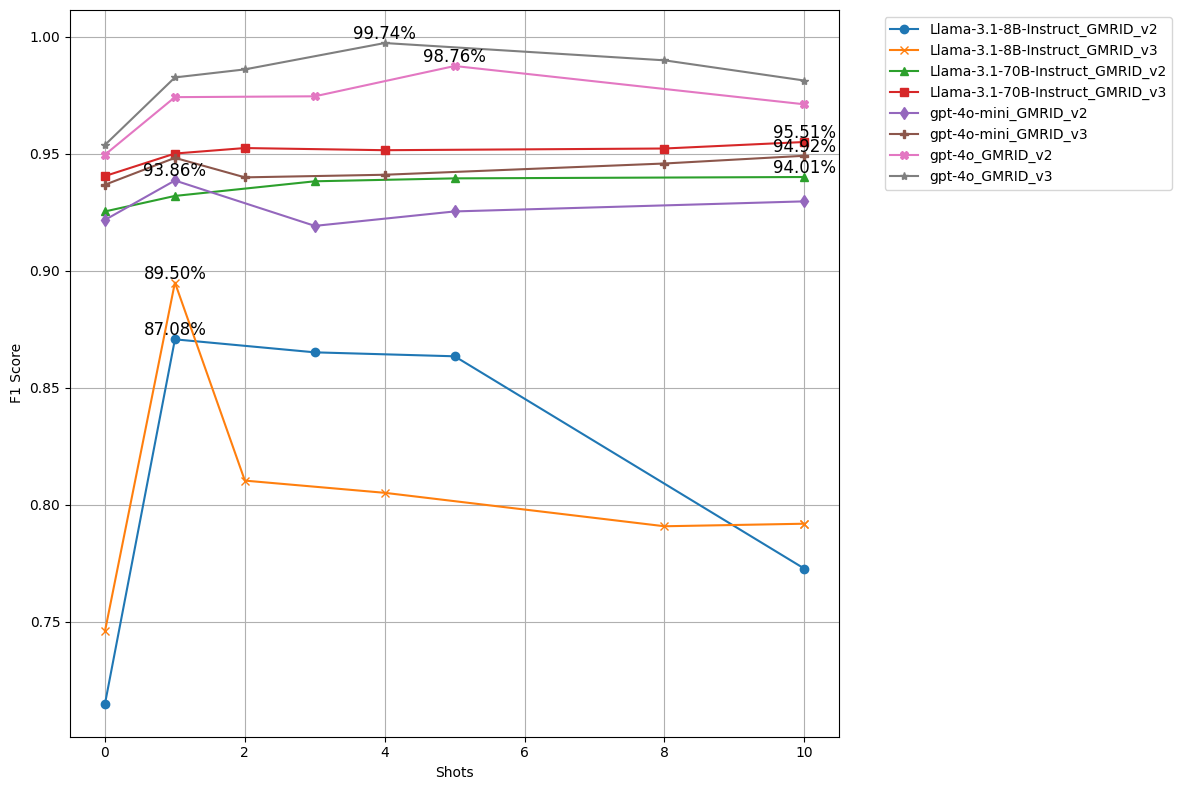

In [45]:
plot_metrics(metrics_df)

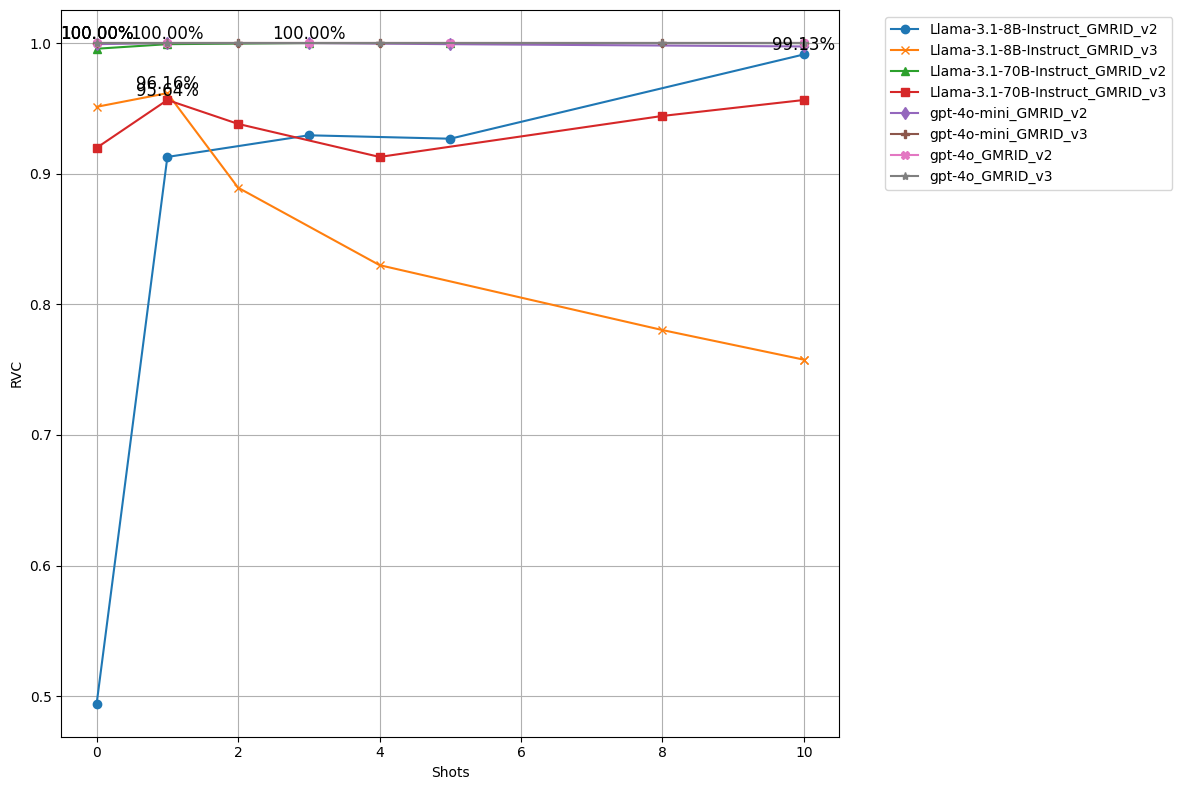

In [46]:
plot_metrics(metrics_df, col="ratio_valid_categories", label="RVC")

In [47]:
top_metrics_df = get_top_metrics_df(metrics_df, models=models)
top_metrics_df

,model,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens,eval_speed
2,Llama-3.1-8B-Instruct_GMRID_v2,1,0.870757,0.834350,0.625290,0.549259,0.912816,1.684394,1359453,703.650621
3,Llama-3.1-8B-Instruct_GMRID_v3,1,0.895039,0.875327,0.000000,0.000000,0.961639,2.485000,1359453,476.951684
19,Llama-3.1-70B-Instruct_GMRID_v2,10,0.940119,0.939843,0.940119,0.939843,1.000000,7.378378,2119265,250.415337
42,Llama-3.1-70B-Instruct_GMRID_v3,10,0.955083,0.954664,0.000000,0.000000,0.956408,2.639000,2400581,793.073715
23,gpt-4o-mini_GMRID_v2,1,0.938635,0.931997,0.938635,0.931997,1.000000,0.590235,1354303,2000.447563
43,gpt-4o-mini_GMRID_v3,10,0.949198,0.942459,0.000000,0.000000,1.000000,1.230000,2396530,1698.690823
36,gpt-4o_GMRID_v2,5,0.987553,0.987794,0.987553,0.987794,1.000000,0.591979,1695380,2496.877761
37,gpt-4o_GMRID_v3,4,0.997369,0.997384,0.000000,0.000000,1.000000,1.242000,1695380,1190.096127


/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


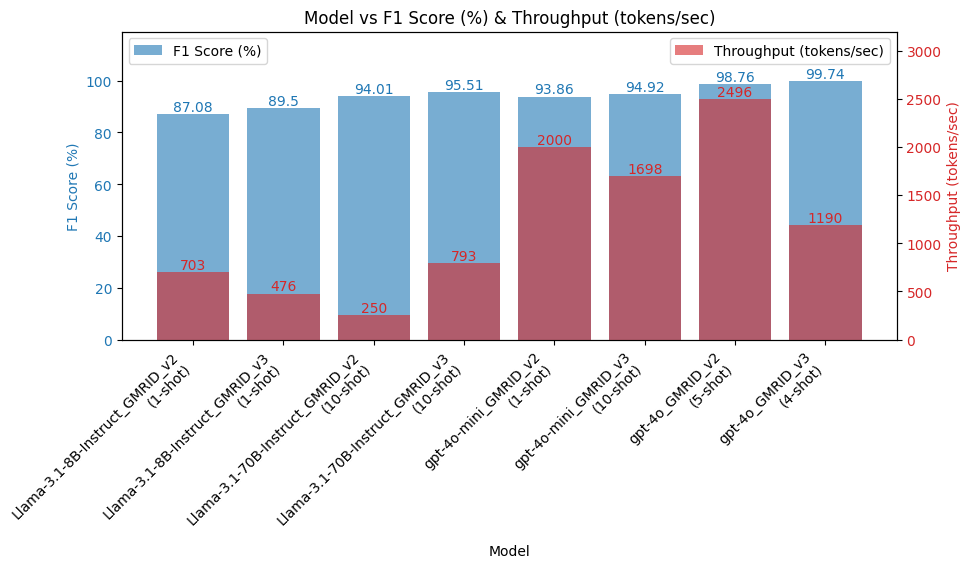

In [48]:
plot_metrics_bar_charts(
    top_metrics_df,
    ylim=[0, 119],
    second_ylim=[0, 3200],
    figsize=(10, 4),
    highlight_best=False,
)

/Users/inflaton/code/papers/maritime-incidents-ai-agents/llm_toolkit/data_utils.py:1121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['model'], rotation=45, ha='right')


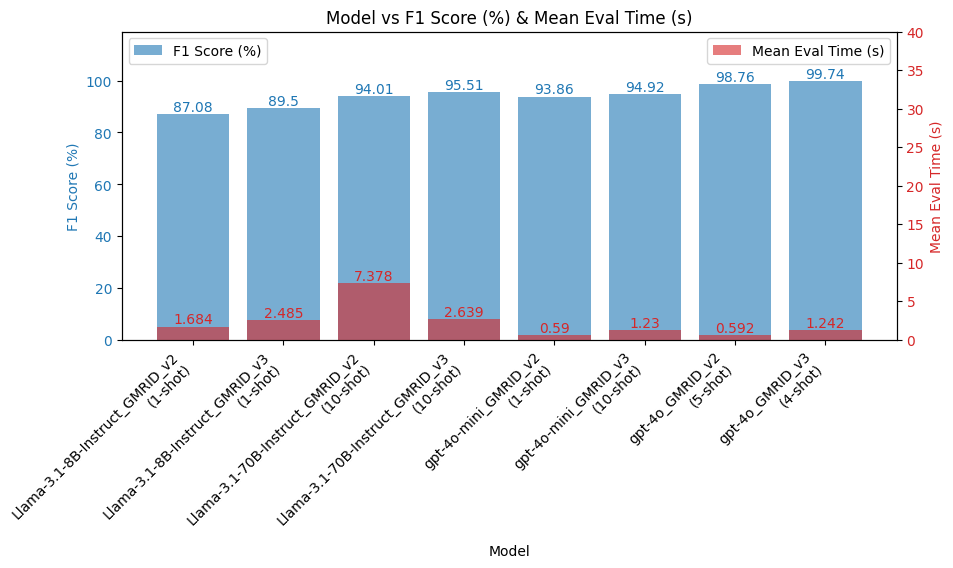

In [49]:
plot_metrics_bar_charts(
    top_metrics_df,
    second_column="eval_time",
    second_title="Mean Eval Time (s)",
    ylim=[0, 119],
    second_ylim=(0, 40),
    second_decimals=3,
    figsize=(10, 4),
    highlight_best=False,
)

In [50]:
top_metrics_df.describe()

,shots,f1,accuracy,f1_raw,accuracy_raw,ratio_valid_categories,eval_time,total_tokens,eval_speed
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000
mean,5.25000,0.941719,0.932977,0.436450,0.426112,0.978858,2.230123,1.797543e+06,1201.275454
std,4.20034,0.042525,0.054527,0.479166,0.474609,0.032507,2.216299,4.515255e+05,793.531658
min,1.00000,0.870757,0.834350,0.000000,0.000000,0.912816,0.590235,1.354303e+06,250.415337
25%,1.00000,0.927736,0.917829,0.000000,0.000000,0.960331,1.070495,1.359453e+06,646.975887
50%,4.50000,0.944659,0.941151,0.312645,0.274629,1.000000,1.463197,1.695380e+06,991.584921
75%,10.00000,0.963200,0.962947,0.939006,0.933958,1.000000,2.523500,2.188581e+06,1774.130008
max,10.00000,0.997369,0.997384,0.987553,0.987794,1.000000,7.378378,2.400581e+06,2496.877761


In [51]:
results_path

'paper/data/open_source_model_results_v3.csv'

In [52]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)